x,y range: (120,) (120,)
X,Y maps: (120, 120) (120, 120)


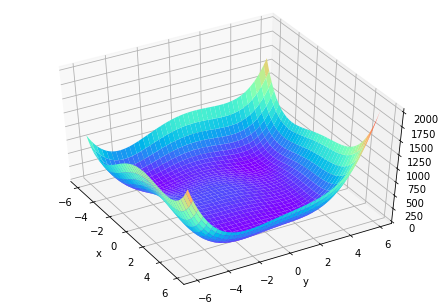

TypeError: can't multiply sequence by non-int of type 'float'

In [7]:
import numpy as np
import tensorflow as tf
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import pyplot as plt

def himmelblau(x):
    # himmelblau函数实现
    return (x[0] ** 2 + x[1] - 11) ** 2 + (x[0] + x[1] ** 2 - 7) ** 2

x = np.arange(-6, 6, 0.1)
y = np.arange(-6, 6, 0.1)
print('x,y range:', x.shape, y.shape)
# 生成x-y平面采样网格点，方便可视化
X, Y = np.meshgrid(x, y)
print('X,Y maps:', X.shape, Y.shape)
Z = himmelblau([X, Y]) # 计算网格点上的函数值

# 绘制himmelblau函数曲面
fig = plt.figure('himmelblau')
#ax = fig.gca(projection='3d')
ax = Axes3D(fig)
ax.plot_surface(X, Y, Z,cmap=plt.get_cmap('rainbow'))
"""
ax.plot_surface(X, Y, Z,
    rstride=1,  # rstride（row）指定行的跨度
    cstride=1,  # cstride(column)指定列的跨度
    cmap=plt.get_cmap('rainbow'))  # 设置颜色映射
"""
ax.view_init(45, -30)   ##用于查看图像的角度
ax.set_xlabel('x')
ax.set_ylabel('y')
plt.show()

# 参数的初始化值对优化的影响不容忽视，可以通过尝试不同的初始化值，
# 检验函数优化的极小值情况
# [1., 0.], [-4, 0.], [4, 0.]
# x = tf.constant([4., 0.])
# x = tf.constant([1., 0.])
#x = tf.constant([-4., 0.])
x = tf.constant([-2., 2.])

for step in range(200):# 循环优化
    with tf.GradientTape() as tape: #梯度跟踪    ##tf.GradientTape()是用于计算梯度的
        tape.watch([x]) # 记录梯度
        y = himmelblau(x) # 前向传播
    # 反向传播
    grads = tape.gradient(y, [x])[0] ##计算梯度
    # 更新参数,0.01为学习率
    x -= 0.01*grads
    # 打印优化的极小值
    if step % 20 == 19:
        print ('step {}: x = {}, f(x) = {}'.format(step, x.numpy(), y.numpy()))